In [1]:
import os
import sys
import random
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label


import tensorflow as tf
from subprocess import check_output
print(check_output(["ls", "/Users/wajdiahmed/Kaggle"]).decode("utf8"))


# Set some parameters
IMG_WIDTH = 1000
IMG_HEIGHT = 1000
IMG_CHANNELS = 3

TRAIN_PATH = '/Users/wajdiahmed/Kaggle/NewData/'


warnings.filterwarnings('ignore', category=UserWarning, module='skimage')
seed = 42
random.seed = seed
np.random.seed = seed

/Users/wajdiahmed/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/wajdiahmed/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


NewData
Single_Cut
cropped
extra_data
stage1_sample_submission.csv
stage1_solution.csv
stage1_test
stage1_train
stage1_train_labels.csv
stage2_sample_submission_final.csv
stage2_test_final



In [3]:
# Get train, dev and test IDs
train_ids = next(os.walk(TRAIN_PATH))[1]
dev_ids = next(os.walk(TRAIN_PATH))[1]



In [4]:

# Get and resize train images and masks
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.uint8)
print('Getting and resizing train images and masks ... ')
sys.stdout.flush()
idi = '/Users/wajdiahmed/Kaggle/NewData/TCGA-G9-6348-01Z-00-DX1/images/TCGA-G9-6348-01Z-00-DX1.png'
idm = '/Users/wajdiahmed/Kaggle/NewData/TCGA-G9-6348-01Z-00-DX1/masks/mask_9.png'

X_train[0] = imread( idi )[:,:,:IMG_CHANNELS]

mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)

mask = imread(idm)
mask = np.expand_dims(resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant', 
                                      preserve_range=True), axis=-1)
Y_train[0] = mask
print('Done!')
print (X_train[0].shape)
print (Y_train[0].shape)

Getting and resizing train images and masks ... 
Done!
(1000, 1000, 3)
(1000, 1000, 1)


/Users/wajdiahmed/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


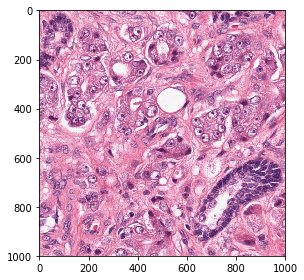

Shape X: (2, 1000, 1000, 3)


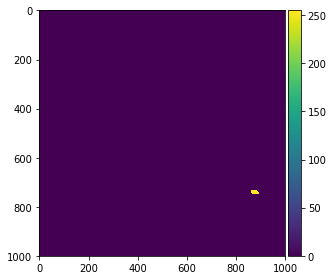

Shape Y (2, 1000, 1000, 1)
0 0 250 250
X_Train :  (2, 1000, 1000, 3)
Image_Cropped :  (2, 250, 250, 3)


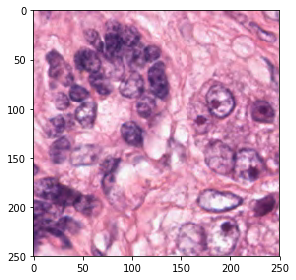

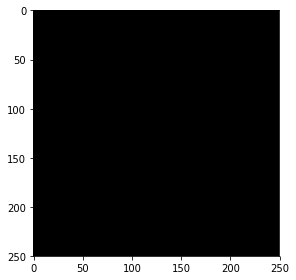

In [6]:
ix=0
imshow(X_train[ix])
plt.show()
print('Shape X:', X_train.shape)
imshow(np.squeeze(Y_train[ix]))
plt.show()
print('Shape Y', Y_train.shape)

# Mask of non-black pixels (assuming image has a single channel).
mask = Y_train[0]

# Coordinates of non-black pixels.
#coords = np.argwhere(mask)

# Bounding box of non-black pixels.
x0, y0 = 0, 0

x1, y1 = 250, 250
print (x0, y0,x1,y1)

# Get the contents of the bounding box.
cropped = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)

cropped = X_train[:, x0:x1, y0:y1,:]
mask_cropp = Y_train[:, x0:x1, y0:y1,:]

print("X_Train : ",X_train.shape)
print("Image_Cropped : ",cropped.shape)


imshow(cropped[0])
plt.show()

imshow(np.squeeze(mask_cropp[0]))
plt.show()





